In [1]:
import random
# модули для математических операций
import math
import numpy as np
import system_solvers # алгоритмы из ВМА
import scipy.integrate as integrate # вычисление интегралов
import scipy.special as special
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с данными
import pandas as pd
pd.options.display.float_format ='{:,.7f}'.format

In [4]:
def approximate_function(func, poly_degree=1, a=0, b=1, plot=True):
    
    n = poly_degree + 1
    
    def s(i, a, b):
        return b**(i+1) / (i + 1) - a**(i+1) / (i + 1)

    def S(n, a, b):
        S = [[None]*n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                S[i][j] = s(i+j, a, b)
        return S
    
    def m(i, a, b):
        return integrate.quad(lambda x: x**i * func(x), a, b)
    
    def M(n, a, b):
        M = [[None]*n for _ in range(n)]
        r = [[None]*n for _ in range(n)]
        for i in range(n):
            M[i], r[i] = m(i, a, b)
        return M, r
    
    solution = system_solvers.reflection_method(S(n, a, b), M(n, a, b)[0])
    
    coefficients = solution[0]
    
    def phi(x, coefficients):
        phi = 0
        n = len(coefficients)
        for i in range(n):
            phi += x**i * coefficients[i]
        return phi
    
    if plot == True:
        x = np.linspace(a, b, 100000)

        fig, ax = plt.subplots()
        ax.plot(x, f(x), label='real function')
        ax.plot(x, phi(x, coefficients), label='approximation')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        plt.legend()
        plt.grid()
        plt.show()
        
    mse = integrate.quad(lambda x: (f(x) - phi(x, coefficients))**2, a, b)
    
    return solution, mse

In [21]:
def lsm(data_x, data_y, poly_degree=1, plot=True):
    
    n = poly_degree + 1
    
    def s(x, k):
        return np.sum(x**k)

    def S(x, n):
        S = [[None]*n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                S[i][j] = s(x, i+j)
        return S
    
    def m(x, j):
        return np.sum(data_y * x**j)

    def M(x, n):
        M = [[None]*n for _ in range(n)]
        for j in range(n):
            M[j] = m(x, j)
        return M
    
    solution = system_solvers.reflection_method( 
    S(data_x, n),
    M(data_x, n))
    
    coefficients = solution[0]
    
    def phi(x, coefficients):
        phi = 0
        n = len(coefficients)
        for i in range(n):
            phi += x**i * coefficients[i]
        return phi
    
    if plot == True:
        x = np.linspace(min(data_x), max(data_x), 100000)

        fig, ax = plt.subplots()
        ax.scatter(data_x, data_y, label='coords')
        ax.plot(x, phi(x, coefficients), label='approximation')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        plt.legend()
        plt.grid()
        plt.show()
        
    mse = np.sum((data_y - phi(data_x, coefficients))**2)
    
    return solution, mse

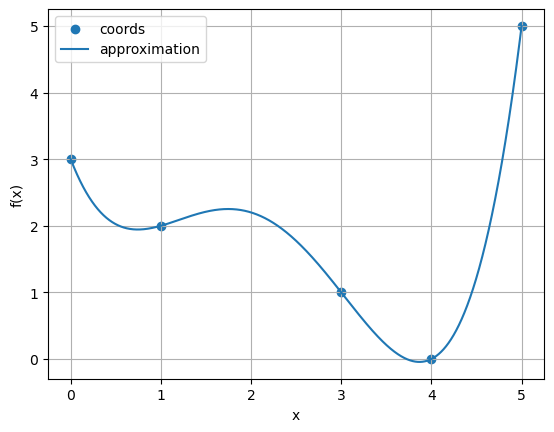

(([3.000000000001567,
   -3.5166666666772715,
   3.8250000000100726,
   -1.4833333333363952,
   0.1750000000002921],
  [2.7284841053187847e-12,
   2.4158453015843406e-13,
   7.105427357601002e-14,
   5.551115123125783e-14,
   1.554312234475219e-14],
  8294399.999986379),
 8.2235229570539e-24)

In [22]:
lsm(np.array([0, 1, 3, 4, 5]), np.array([3, 2, 1, 0, 5]), 4, True)

In [5]:
def f(x):
    return x ** 2

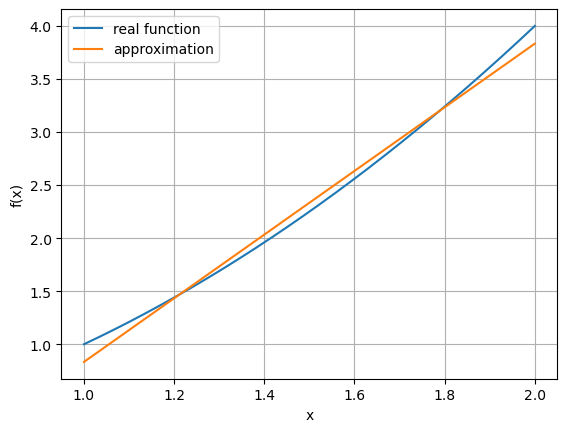

(([-2.166666666666666, 3.0],
  [0.0, 2.498001805406602e-16],
  -0.0833333333333335),
 (0.005555555555555558, 6.167905692361984e-17))

In [7]:
approximate_function(f, 1, 1, 2, True)

In [8]:
13/6

2.1666666666666665

In [1]:
0.026 / (1-0.85)

0.1733333333333333

In [11]:
2*abs(math.pi / 24)*20 <= 3*math.sqrt(2) - math.pi/6 + 4

True

In [8]:
math.sqrt(2) - math.pi**2 / 144 + 4*math.pi/12 - 3

-0.6071278058823166

In [10]:
3*math.sqrt(2) - math.pi/6 + 4

7.719041911520987

In [23]:
120/75

1.6

In [25]:
5**(1/3)

1.7099759466766968

In [26]:
5-3.2

1.7999999999999998

In [27]:
2*1.6*30

96.0

In [6]:
def prod(x):
    product = np.cos(x)
    for i in range(1, 2025):
        product *= np.sin(i*x)
    return product

In [7]:
integrate.quad(lambda x: prod(x), 0, math.pi)

(0.0, 0.0)

In [17]:
def f(x):
    return np.absolute(x)

def phi(x):
    return 15/16 * x**2 + 3/16

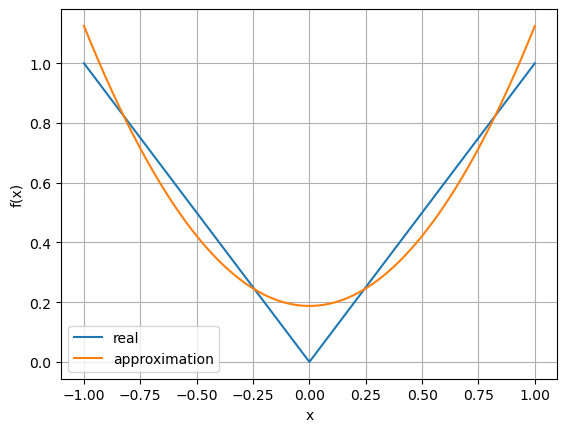

In [18]:
 x = np.linspace(-1, 1, 100000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='real')
ax.plot(x, phi(x), label='approximation')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()